<a href="https://colab.research.google.com/github/emekeh/webscraping-jumia/blob/main/jumia_laptops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from warnings import filterwarnings

In [29]:
df = pd.read_csv('/content/laptop_data.csv')
df

,name,actual_price,discount_price,rating
0,NaN,NaN,"₦ 613,999",NaN
1,NaN,NaN,"₦ 326,139",NaN
2,NaN,NaN,"₦ 250,000",NaN
3,NaN,NaN,"₦ 380,000",NaN
4,NaN,NaN,"₦ 208,000",NaN
...,...,...,...,...
2090,Hp ProBook 11 G1 EE X360 Intel Celeron 128SSD ...,NaN,"₦ 190,000",NaN
2091,Hp EliteBook 840 G5 Intel Core I5- 8GB RAM/256...,"₦ 600,000","₦ 350,000",NaN
2092,Hp EliteBook 840 G5 Intel Core I5- 8GB RAM/512...,"₦ 550,000","₦ 360,000",NaN
2093,Hp Laptop 15 INTEL CELERON Quad Core- Backlit ...,NaN,"₦ 300,000",NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2000 non-null   object
 1   actual_price    1397 non-null   object
 2   discount_price  2005 non-null   object
 3   rating          461 non-null    object
dtypes: object(4)
memory usage: 65.6+ KB


### Data Cleaning

In [31]:
# Remove unnecessary symbols
df['actual_price'] = df['actual_price'].str.replace(',', '').str.replace('₦', '')
df['discount_price'] = df['discount_price'].str.replace(',', '').str.replace('₦', '')

In [32]:
# Extract the rating value
df['rating'] = df['rating'].str.extract('(\d+\.\d+)')

In [33]:
# Remove rows with missing values
df.dropna(inplace=True)

In [34]:
# updated DataFrame
df

,name,actual_price,discount_price,rating
17,Hp 255 AMD Athlon Gold 8GB RAM 2.4GHz To 3.3GH...,289900,265500,4.3
18,Hp 15 Intel Pentium Silver 8GB RAM 1TB HDD Win...,338000,291000,4.4
20,Hp Stream 11-Intel Celeron 64GB SSD/4GB Ram+po...,150000,104000,4.5
21,Hp 255 AMD Athlon Gold 12GB RAM 2.4GHz To 3.3G...,299950,280500,4.6
22,Lenovo AMD RYZEN 3 1TB 8GB RAM 1TB HDD 2.6 To ...,272800,260600,4.1
...,...,...,...,...
1984,Hp EliteBook 840 G5 Intel Core I5-16GB RAM/512...,560000,360000,4.8
2015,Hp ProBook 11 X360- TOUCH Intel Celeron 256GB ...,650000,200000,3.9
2019,Hp 15 AMD ATHLON SILVER 12GB RAM 1TB HDD Windo...,325000,280700,4.1
2024,Hp ProBook 11 X360- TOUCH- 128GB SSD/4GB RAM-I...,200000,190000,4.5


In [35]:
# Change data types of columns 2-4 from object to float
df['actual_price'] = df['actual_price'].astype(float)
df['discount_price'] = df['discount_price'].astype(float)
df['rating'] = df['rating'].astype(float)

In [36]:
df.isnull().sum() /len(df) * 100

name              0.0
actual_price      0.0
discount_price    0.0
rating            0.0
dtype: float64

In [37]:
df.describe()

,actual_price,discount_price,rating
count,158.000000,158.000000,158.000000
mean,407986.987342,293570.063291,4.115823
std,211704.317623,151140.194231,0.531615
min,11200.000000,8900.000000,1.500000
25%,200000.000000,183775.000000,3.800000
50%,390000.000000,295500.000000,4.300000
75%,550225.000000,375000.000000,4.500000
max,966000.000000,890000.000000,4.800000


In [38]:
# Number of rows and columns after removing empty rows
df.shape

(158, 4)

In [39]:
# Extracting the brand name, processor, RAM size, and storage type
df['name'] = df['name'].str.replace('/', ' ')

df['brand'] = df['name'].str.split().str[0]
df['processor'] = df['name'].str.extract('(\w+ (?:Core|Core I5|i\d|Pentium|Celeron|CELERON QUAD CORE|AMD|AMD Athlon))')
df['ram'] = df['name'].str.extract('(\d+GB RAM|\d+GB DDR4)')
df['storage_type'] = df['name'].str.extract('(SSD|HDD|eMMC)')
df['storage_size'] = df['name'].str.extract('(\d+TB|\d+GB)')

In [40]:
df.head(2)

,name,actual_price,discount_price,rating,brand,processor,ram,storage_type,storage_size
17,Hp 255 AMD Athlon Gold 8GB RAM 2.4GHz To 3.3GH...,289900.0,265500.0,4.3,Hp,255 AMD,8GB RAM,HDD,8GB
18,Hp 15 Intel Pentium Silver 8GB RAM 1TB HDD Win...,338000.0,291000.0,4.4,Hp,Intel Pentium,8GB RAM,HDD,8GB


In [41]:
# Save the cleaned data to a new csv file
df.to_csv('laptops_data_cleaned.csv', index=False)

In [42]:
df.shape

(158, 9)

<ipython-input-43-6975deee9bcd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


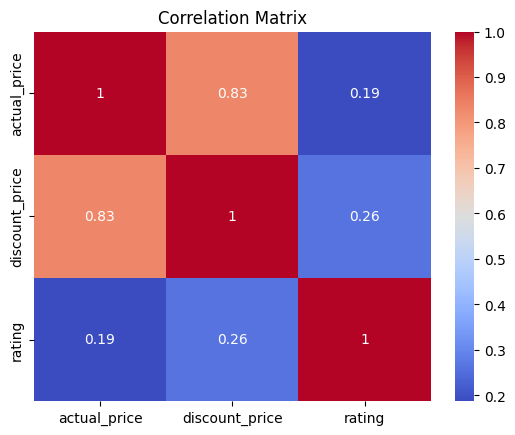

In [43]:
# Explore the relationships between variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [44]:
# Compare the specifications of different laptops
df.groupby(['brand', 'processor', 'ram', 'storage_type']).agg({'storage_size': 'unique'})

storage_size
brand  processor               ram      storage_type                       
DELL   Intel Core              16GB RAM SSD                          [16GB]
                               8GB RAM  SSD                           [8GB]
       Intel Pentium           8GB RAM  HDD                           [8GB]
Hp     15 AMD                  12GB RAM HDD                          [12GB]
       255 AMD                 12GB RAM HDD                          [12GB]
                               8GB RAM  HDD                           [8GB]
       G5 Core                 16GB RAM SSD                          [16GB]
       Intel CELERON QUAD CORE 4GB RAM  SSD           [512GB, 128GB, 256GB]
       Intel Celeron           4GB DDR4 SSD                     [4GB, 64GB]
                               4GB RAM  HDD                           [4GB]
                                        SSD                     [4GB, 64GB]
                               8GB RAM  HDD                           [8GB]
       Intel Core              12GB RAM HDD                          [12GB]
                                        SSD                          [12GB]
                               16GB RAM HDD                           [1TB]
                                        SSD                          [16GB]
                               8GB RAM  HDD                           [8GB]
                                        SSD                           [8GB]
       Intel Pentium           4GB RAM  SSD                         [256GB]
                               8GB RAM  HDD                           [8GB]
       Quad Core               16GB RAM HDD                          [16GB]
                               8GB RAM  HDD                           [8GB]
Lenovo Intel Celeron           4GB RAM  HDD                      [1TB, 4GB]
       Intel Core              12GB RAM HDD                          [12GB]
                               8GB RAM  HDD                           [8GB]
       Lenovo AMD              8GB RAM  HDD                           [1TB]
       Quad Core               4GB RAM  SSD                          [64GB]

### Identifying popular brands or processorss

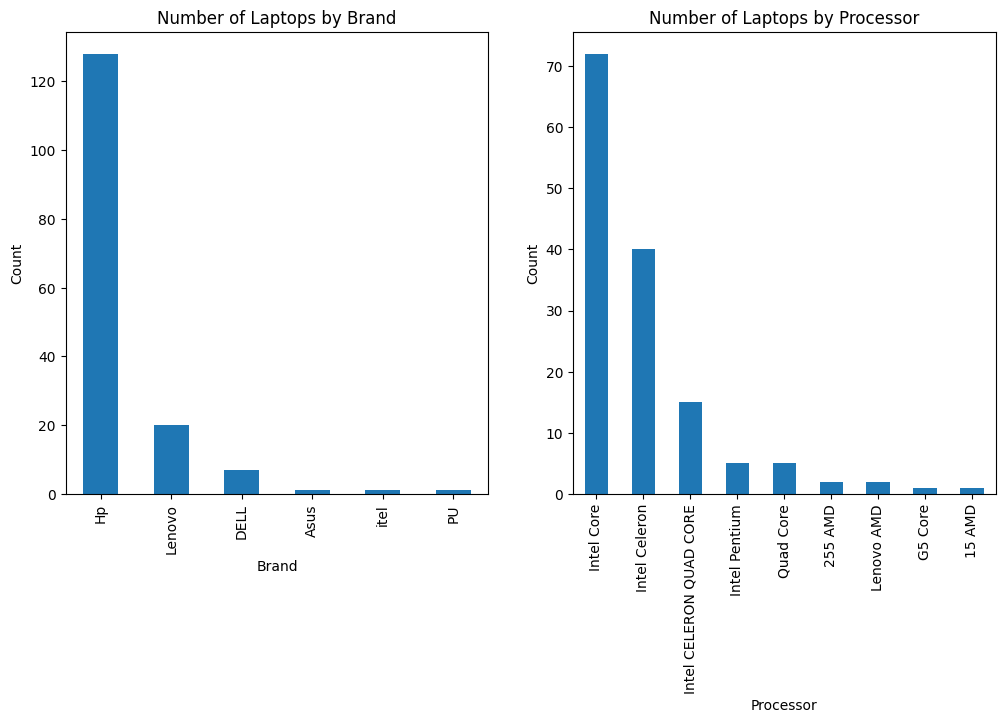

In [45]:
# Count the number of laptops by brand and processor
brand_count = df['brand'].value_counts()
processor_count = df['processor'].value_counts()

# Visualize the popularity of brands and processors using bar charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
brand_count.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Count')
axes[0].set_title('Number of Laptops by Brand')
processor_count.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Processor')
axes[1].set_ylabel('Count')
axes[1].set_title('Number of Laptops by Processor')
plt.show()

In [46]:
# Compare brand prices
brand_prices = df.groupby('brand')['actual_price'].mean()
print(brand_prices)

brand
Asus      850000.000000
DELL      318142.857143
Hp        439721.046875
Lenovo    245097.500000
PU         11200.000000
itel      187500.000000
Name: actual_price, dtype: float64


In [47]:
# Compare RAM sizes
ram_prices = df.groupby('ram')['actual_price'].mean()
print(ram_prices)

ram
12GB RAM    489912.500000
16GB RAM    597226.431373
4GB DDR4    323333.333333
4GB RAM     232682.056604
8GB RAM     404465.880000
Name: actual_price, dtype: float64


In [48]:
# Compare ratings
rating_stats = df['rating'].describe()
print(rating_stats)

count    158.000000
mean       4.115823
std        0.531615
min        1.500000
25%        3.800000
50%        4.300000
75%        4.500000
max        4.800000
Name: rating, dtype: float64
